In [ ]:
#Install packages
!pip install rasterio
!pip install rastertodataframe
!pip install pyproj
!pip install geopandas
!pip install osgeo

In [2]:
#Import Base Libraries
import pandas as pd
import numpy as np
import glob

#Import Raster Libraries
import rasterio
from rastertodataframe import raster_to_dataframe

#Import Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from rasterio.plot import show

In [3]:
#Mount to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Area Tiff Files

Read in Tiff files of area and merge.

In [4]:
#function to turn tiff to df
def tiff_to_df_colab(path):
  """
  Input - File path that contains tiff files
  Output - Pandas dataframe of all raster layer values 
  """
  #Create folder path and list variables
  folder_path = path
  file_list = glob.glob(folder_path + "/*.tiff")

  #initiate empty dataframe
  main_dataframe = pd.DataFrame()

  for i in file_list:
    data = raster_to_dataframe(i)
  
    #extract name of band from file path
    band_info = str(i).split('/')[-1]
    band_name = band_info[-14:-11]
    #rename with band name
    data = data.rename(columns = {'Band_1': band_name})
    #merge into main dataframe
    main_dataframe = pd.concat([main_dataframe, data], axis = 1)

  return main_dataframe

In [14]:
#Create folder path variable
folder_path = '/content/drive/MyDrive/AISC/James_Bay_medium'

#Create dataframe
data = tiff_to_df_colab(folder_path)
data.head()

,B01,B06,B11,B07,B05,B03,B09,B12,B8A,B04,B08,B02
0,0.0055,0.0017,0.0009,0.0016,0.0026,0.0056,0.0001,0.0009,0.0003,0.0032,0.0012,0.0114
1,0.0054,0.0020,0.0009,0.0017,0.0021,0.0060,0.0001,0.0005,0.0007,0.0028,0.0014,0.0115
2,0.0058,0.0018,0.0007,0.0016,0.0028,0.0060,0.0001,0.0008,0.0007,0.0030,0.0012,0.0124
3,0.0057,0.0016,0.0007,0.0016,0.0023,0.0058,0.0001,0.0012,0.0006,0.0031,0.0011,0.0119
4,0.0066,0.0013,0.0008,0.0020,0.0029,0.0059,0.0001,0.0008,0.0005,0.0030,0.0014,0.0115


## NARCAN Data

Upload the clipped and transformed NRCANN Data

Merge with main_dataframe

In [15]:
#Path for raster data from NRCAN
data_path = '/content/drive/MyDrive/AISC/James_Bay_Med.tif'

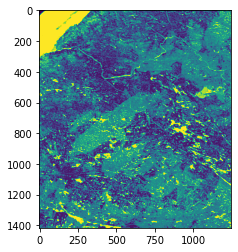

In [16]:
#Open data with rasterio
img = rasterio.open(data_path)
show(img, 0)

In [17]:
#Read the image
array = img.read()

#Create numpy array
array = np.array(array)

#Check shape
array.shape

(1, 1417, 1250)

In [18]:
#Read NRCAN raster to dataframe
nrcann = raster_to_dataframe(data_path)
nrcann.head()

,Band_1
0,0
1,0
2,0
3,0
4,0


In [19]:
#Rename column
nrcann = nrcann.rename(columns={'Band_1':'Class'})

#Print sum of classification types
print('Number of NRCANN Classes: ', nrcann.Class.nunique())

#Check which classifications are listed
print(nrcann.Class.value_counts())

Number of NRCANN Classes:  14
1     582967
8     508063
18    260790
2     134079
12    113461
10     67576
5      54330
16     32239
13     13597
14      1986
0        773
6        591
17       512
11       286
Name: Class, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


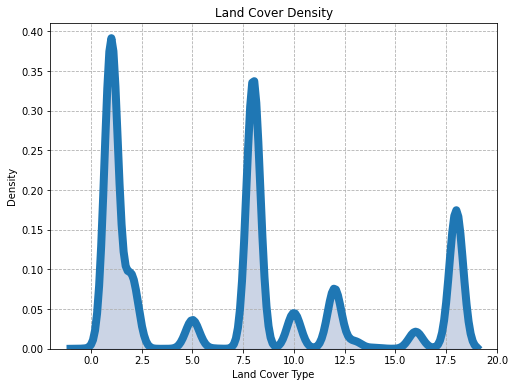

In [20]:
#Plot Class distribution
plt.figure(figsize=[8,6])
plt.grid(linestyle='--')
dp = sns.distplot(nrcann.Class, hist=False, kde_kws=dict(linewidth=8))
l1 = dp.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
dp.fill_between(x1,y1, color="#5471ab", alpha=0.3)
dp.set_xlim(-2, 20)
dp.set_xlabel("Land Cover Type")
dp.set_title("Land Cover Density")

#Save
fig = dp.get_figure()
fig.savefig('/content/drive/MyDrive/James_Bay_classes.png')

In [21]:
#Double check shapes
data.shape, nrcann.shape

((1771250, 12), (1771250, 1))

In [22]:
#Merge nrcann with data
new_data = pd.concat([data, nrcann], axis = 1)
new_data.head()

,B01,B06,B11,B07,B05,B03,B09,B12,B8A,B04,B08,B02,Class
0,0.0055,0.0017,0.0009,0.0016,0.0026,0.0056,0.0001,0.0009,0.0003,0.0032,0.0012,0.0114,0
1,0.0054,0.0020,0.0009,0.0017,0.0021,0.0060,0.0001,0.0005,0.0007,0.0028,0.0014,0.0115,0
2,0.0058,0.0018,0.0007,0.0016,0.0028,0.0060,0.0001,0.0008,0.0007,0.0030,0.0012,0.0124,0
3,0.0057,0.0016,0.0007,0.0016,0.0023,0.0058,0.0001,0.0012,0.0006,0.0031,0.0011,0.0119,0
4,0.0066,0.0013,0.0008,0.0020,0.0029,0.0059,0.0001,0.0008,0.0005,0.0030,0.0014,0.0115,0


In [23]:
#Save merged data
new_data.to_csv('/content/drive/MyDrive/james_bay_data.csv', index = False)